# Problem : Employee Absenteeism



In [54]:
#Load Libraries
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN
from scipy.stats import chi2_contingency

In [55]:
#Loading dataSet
os.chdir("/Users/bhartisharma/Desktop/Employee Absenteeism")
dataset = pd.read_excel("Absenteeism_at_work_Project.xls")

In [56]:
dataset_copy = pd.read_excel("Absenteeism_at_work_Project.xls")

# Data

In [57]:
dataset.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,NaN
6,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
7,20,23.0,7.0,6,1,260.0,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
8,14,19.0,7.0,2,1,155.0,12.0,14.0,34.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
9,1,22.0,7.0,2,1,235.0,11.0,14.0,37.0,239554.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0


In [58]:
#Dimensions of Data
dataset.shape

(740, 21)

In [59]:
#Data Information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 737 non-null float64
Month of absence                   739 non-null float64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             733 non-null float64
Distance from Residence to Work    737 non-null float64
Service time                       737 non-null float64
Age                                737 non-null float64
Work load Average/day              730 non-null float64
Hit target                         734 non-null float64
Disciplinary failure               734 non-null float64
Education                          730 non-null float64
Son                                734 non-null float64
Social drinker                     737 non-null float64
Social smoker                      736 non-null float64
Pet  

In [60]:
#Statistics of Data
dataset.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,737.000000,739.000000,740.000000,740.000000,733.000000,737.000000,737.000000,737.000000,730.000000,...,734.000000,730.000000,734.000000,737.000000,736.000000,738.000000,739.000000,726.000000,709.000000,718.000000
mean,18.017568,19.188602,6.319350,3.914865,2.544595,221.035471,29.667571,12.565807,36.449118,271188.860274,...,0.053134,1.295890,1.017711,0.567164,0.073370,0.746612,79.063599,172.152893,26.684062,6.977716
std,11.021247,8.437493,3.435948,1.421675,1.111831,66.954179,14.848124,4.389813,6.480148,38981.880873,...,0.224453,0.676965,1.094928,0.495805,0.260919,1.319726,12.868630,6.081065,4.292819,13.476962
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [61]:
#Checking frequency of the employee  who have maximum hours of  ‘Absenteeism time in hours' 
dataset['Absenteeism time in hours'].value_counts()

8.0      199
2.0      155
3.0      110
1.0       88
4.0       60
0.0       36
16.0      19
24.0      16
40.0       7
5.0        7
32.0       5
64.0       3
80.0       3
120.0      3
56.0       2
112.0      2
104.0      1
7.0        1
48.0       1
Name: Absenteeism time in hours, dtype: int64

# Exploratory Data Analysis

In [62]:
#DataCat is a dataframe containing all categorical variables from dataset
DataCat = pd.DataFrame()
DataCat = dataset[['ID','Reason for absence','Month of absence','Day of the week','Seasons','Disciplinary failure',
                   'Education','Son','Social drinker','Social smoker','Pet']]

#DataCon is a dataframe containing all continuous variables from dataset
DataCon = pd.DataFrame()
DataCon = dataset[['Transportation expense','Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target','Weight', 'Height', 'Body mass index','Absenteeism time in hours']]

#Converting some integer and float variables to categorical variable as per requirement
dataset[DataCat.columns] = dataset[DataCat.columns].astype(object)

#Assigning (-1) in continuous data to all NA and INF values for temporary basis for float datattype conversion to int data type. Missing value data will be handled as per process under the data preprocessing
dataset[DataCon.columns] = dataset[DataCon.columns].replace(np.nan , -1)

#Converting float variables to integer type Since there are no float values present in dataset
dataset[DataCon.columns] = dataset[DataCon.columns].astype(int)

In [63]:
dataset.dtypes

ID                                 object
Reason for absence                 object
Month of absence                   object
Day of the week                    object
Seasons                            object
Transportation expense              int64
Distance from Residence to Work     int64
Service time                        int64
Age                                 int64
Work load Average/day               int64
Hit target                          int64
Disciplinary failure               object
Education                          object
Son                                object
Social drinker                     object
Social smoker                      object
Pet                                object
Weight                              int64
Height                              int64
Body mass index                     int64
Absenteeism time in hours           int64
dtype: object

In [64]:
#categorising given data for  variable 'Reason for absence' in two categories as per problem statement
r,c =dataset.shape
for i in range(0,r):
    #print(i)
    if(dataset.loc[i,('Reason for absence')] != 0):
        if(dataset.loc[i,('Reason for absence')] <= 21):
            #print(dataset['Reason for absence'][i])
            dataset.loc[i,('Reason for absence')] = 'ICD'
        elif(dataset.loc[i,('Reason for absence')] >= 22):
            dataset.loc[i,('Reason for absence')] = 'Not ICD'
            

In [65]:
#Categorising given data for Disciplinary failure , Social drinker , Social smoker 
for i in range(0,r):
    if(dataset.loc[i,('Disciplinary failure')] == 0):
        dataset.loc[i,('Disciplinary failure')] = 'No'
    elif(dataset.loc[i,('Disciplinary failure')] == 1):
        dataset.loc[i,('Disciplinary failure')] = 'Yes'
        

for i in range(0,r):
    if(dataset.loc[i,('Social drinker')] == 0):
        dataset.loc[i,('Social drinker')] = 'No'
    elif(dataset.loc[i,('Social drinker')] == 1):
        dataset.loc[i,('Social drinker')] = 'Yes'
        
        
        
for i in range(0,r):
    if(dataset.loc[i,('Social smoker')] == 0):
        dataset.loc[i,('Social smoker')] = 'No'
    elif(dataset.loc[i,('Social smoker')] == 1):
        dataset.loc[i,('Social smoker')] = 'Yes'

In [66]:
#Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))

dataset['Day of the week']
for i in range(0,r):
    if(dataset.loc[i,('Day of the week')] == 2):
        dataset.loc[i,('Day of the week')] = 'Monday'
    elif(dataset.loc[i,('Day of the week')] == 3):
        dataset.loc[i,('Day of the week')] = 'Tuesday'
    elif(dataset.loc[i,('Day of the week')] == 4):
        dataset.loc[i,('Day of the week')] = 'Wednesday'
    elif(dataset.loc[i,('Day of the week')] == 5):
        dataset.loc[i,('Day of the week')] = 'Thursday'
    elif(dataset.loc[i,('Day of the week')] == 6):
        dataset.loc[i,('Day of the week')] = 'Friday'

In [67]:
#Seasons (summer (1), autumn (2), winter (3), spring (4))
for i in range(0,r):
    if(dataset.loc[i,('Seasons')] == 1):
        dataset.loc[i,('Seasons')] = 'summer'
    elif(dataset.loc[i,('Seasons')] == 2):
        dataset.loc[i,('Seasons')] = 'autumn'
    elif(dataset.loc[i,('Seasons')] == 3):
        dataset.loc[i,('Seasons')] = 'winter'
    elif(dataset.loc[i,('Seasons')] == 4):
        dataset.loc[i,('Seasons')] = 'spring'

In [68]:
# Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
for i in range(0,r):
    if(dataset.loc[i,('Education')] == 1):
        dataset.loc[i,('Education')] = 'high school'
    elif(dataset.loc[i,('Education')] == 2):
        dataset.loc[i,('Education')] = 'graduate'
    elif(dataset.loc[i,('Education')] == 3):
        dataset.loc[i,('Education')] = 'postgraduate'
    elif(dataset.loc[i,('Education')] == 4):
        dataset.loc[i,('Education')] = 'master and doctor'

In [69]:
dataset.head(2)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,Not ICD,7,Tuesday,summer,289,36,13,33,239554,...,No,high school,2,Yes,No,1,90,172,30,4
1,36,0,7,Tuesday,summer,118,13,18,50,239554,...,Yes,high school,1,Yes,No,0,98,178,31,0


In [70]:
dataset.to_csv('Absenteeism_EDA.csv',index=False)


Transportation expense


/Users/bhartisharma/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/bhartisharma/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


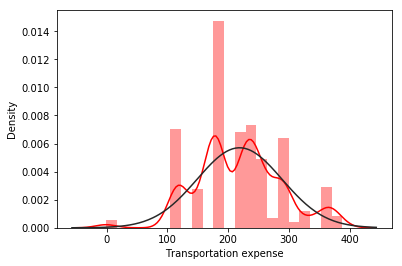

Distance from Residence to Work


/Users/bhartisharma/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


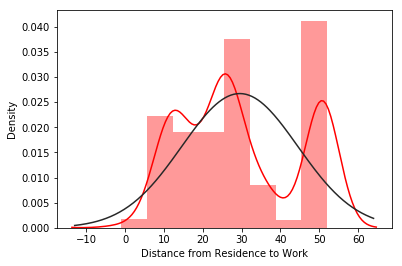

Service time


/Users/bhartisharma/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


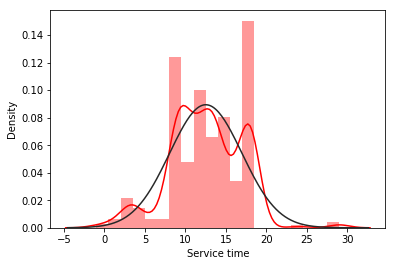

Age


/Users/bhartisharma/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


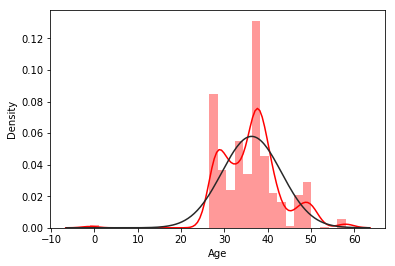

Work load Average/day 


/Users/bhartisharma/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


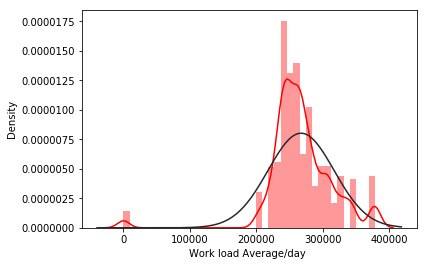

Hit target


/Users/bhartisharma/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


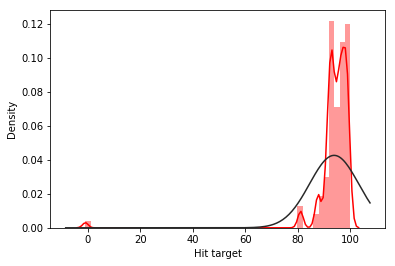

Weight


/Users/bhartisharma/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


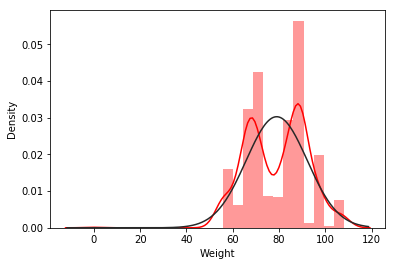

Height


/Users/bhartisharma/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


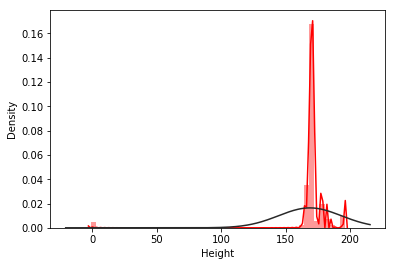

Body mass index


/Users/bhartisharma/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


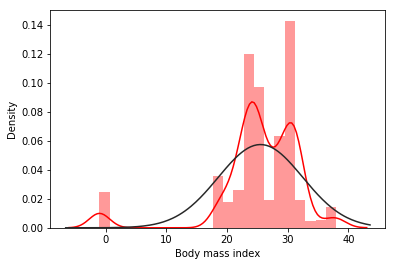

Absenteeism time in hours


/Users/bhartisharma/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


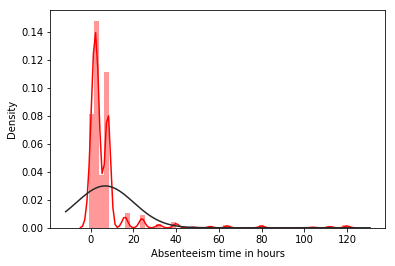

In [71]:
# Density Plot and Histogram of all variables
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
df = dataset
for i in DataCon:
    print(i)
    sns.distplot( dataset[i] , hist = True, color = 'red' ,norm_hist = True, kde = True, fit=norm)
    plt.ylabel('Density')
    
    plt.show()



In [72]:
# Sum of Absenteeism time in hours per Month
for i in range(1,13):
    #print(i)
    print(i , dataset['Absenteeism time in hours'][dataset['Month of absence'] == i].sum())
    

1 222
2 294
3 746
4 482
5 390
6 402
7 722
8 270
9 281
10 336
11 459
12 381


In [73]:
# Mean of Absenteeism time in hours per Month
for i in range(1,13):
    #print(i)
    print(i , dataset['Absenteeism time in hours'][dataset['Month of absence'] == i].mean())
    

1 4.44
2 4.083333333333333
3 8.574712643678161
4 9.09433962264151
5 6.09375
6 7.444444444444445
7 10.776119402985074
8 5.0
9 5.30188679245283
10 4.8
11 7.285714285714286
12 7.775510204081633


# Data Preprocessing


# Missing Values Imputation

In [74]:
#Dividing Categorical variables into two dataframes
#Variables like ID,Reason for absence,Day of the week ,Seasons ,Education. Since in this case 0 shows loss of 
#information,So we will replace them with NaN values and then impute them
DataCat_1 = pd.DataFrame()
DataCat_1 = DataCat[['ID','Reason for absence','Month of absence','Day of the week','Seasons','Education']]

In [75]:
#Variables like 'Disciplinary failure','Son', 'Social drinker','Social smoker', 'Pet' 
#They include 0 as important information so we are keeping them in other dataset
DataCat_2 = pd.DataFrame()
DataCat_2 = DataCat[['Disciplinary failure', 'Social drinker','Social smoker']]

In [76]:
#DataCat_1
#replace 0 with NA 
for i in range(0, DataCat_1.shape[1]):
    #print(DataCat_1.iloc[:,i] )
    DataCat_1.iloc[:,i] = DataCat_1.iloc[:,i].replace(0, np.nan) 


/Users/bhartisharma/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [77]:
DataCat_1.isnull().sum()

ID                     0
Reason for absence    46
Month of absence       4
Day of the week        0
Seasons                0
Education             10
dtype: int64

In [78]:
#DataCat_1
#Assigning levels to the categories
#lis = []
for i in range(0, DataCat_1.shape[1]):
        DataCat_1.iloc[:,i] = pd.Categorical(DataCat_1.iloc[:,i])
        DataCat_1.iloc[:,i] = DataCat_1.iloc[:,i].cat.codes 
        DataCat_1.iloc[:,i] = DataCat_1.iloc[:,i].astype('object')
        

/Users/bhartisharma/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [79]:
#DataCat_1
#replace -1 with NA to impute
for i in range(0, DataCat_1.shape[1]):
   DataCat_1.iloc[:,i] = DataCat_1.iloc[:,i].replace(-1, np.nan) 



/Users/bhartisharma/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/Users/bhartisharma/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [80]:
#DataCat_2
DataCat_2 = DataCat_2.replace('Yes',1)
DataCat_2 = DataCat_2.replace('No',0)

#Add remaining two variables 'Son' and 'Pet' in categorical 2
DataCat_2 = DataCat_2.join(DataCat[['Son','Pet']])


In [81]:
#Creating New DataFrame DataSet to copy Continuous(DataCon) and Categorical DataSet after imputing missing values seprately
DataSet = pd.DataFrame()
DataSet = DataCon
DataSet.head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Weight,Height,Body mass index,Absenteeism time in hours
0,289.0,36.0,13.0,33.0,239554.0,97.0,90.0,172.0,30.0,4.0
1,118.0,13.0,18.0,50.0,239554.0,97.0,98.0,178.0,31.0,0.0
2,179.0,51.0,18.0,38.0,239554.0,97.0,89.0,170.0,31.0,2.0
3,279.0,5.0,14.0,39.0,239554.0,97.0,68.0,168.0,24.0,4.0
4,289.0,36.0,13.0,33.0,239554.0,97.0,90.0,172.0,30.0,2.0


In [82]:
#Create dataframe with missing percentage 
#For Continuous Variables
MisVal = pd.DataFrame(DataSet.isnull().sum())
#Reset index
MisVal = MisVal.reset_index()

#Rename variable
MisVal = MisVal.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
MisVal['Missing_percentage'] = (MisVal['Missing_percentage']/len(DataSet))*100

print(MisVal)


                         Variables  Missing_percentage
0           Transportation expense            0.945946
1  Distance from Residence to Work            0.405405
2                     Service time            0.405405
3                              Age            0.405405
4           Work load Average/day             1.351351
5                       Hit target            0.810811
6                           Weight            0.135135
7                           Height            1.891892
8                  Body mass index            4.189189
9        Absenteeism time in hours            2.972973


In [83]:
#Firstly Imputating missing values for Continuous Variables
#create missing value
print(DataSet['Distance from Residence to Work'].loc[4])
DataSet['Distance from Residence to Work'].loc[4] = np.nan
#Actual Value - 36

36.0


/Users/bhartisharma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [84]:
#Impute with mean
#DataSet['Distance from Residence to Work'] = DataSet['Distance from Residence to Work'].fillna(DataSet['Distance from Residence to Work'].mean())
#print(DataSet['Distance from Residence to Work'].loc[4])

In [85]:
#Impute with median
#DataSet['Distance from Residence to Work'] = DataSet['Distance from Residence to Work'].fillna(DataSet['Distance from Residence to Work'].median())
#print(DataSet['Distance from Residence to Work'].loc[4])


In [86]:
#Apply KNN imputation algorithm for ontinuous Variables
DataSet = pd.DataFrame(KNN(k = 3).complete(DataSet), columns = DataSet.columns)

Imputing row 1/740 with 0 missing, elapsed time: 0.102
Imputing row 101/740 with 1 missing, elapsed time: 0.105
Imputing row 201/740 with 0 missing, elapsed time: 0.106
Imputing row 301/740 with 0 missing, elapsed time: 0.107
Imputing row 401/740 with 0 missing, elapsed time: 0.108
Imputing row 501/740 with 0 missing, elapsed time: 0.109
Imputing row 601/740 with 0 missing, elapsed time: 0.110
Imputing row 701/740 with 0 missing, elapsed time: 0.110


In [87]:
DataSet.isnull().sum()

Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [88]:
#For Categorical Variables Imputting with Mode
DataCat_1 = DataCat_1.replace(np.nan,DataCat_1.mode())
DataCat_1.isnull().sum()

ID                    0
Reason for absence    0
Month of absence      0
Day of the week       0
Seasons               0
Education             0
dtype: int64

In [89]:
#Adding Categorical variables to main dataset after imputing
DataSet = DataSet.join(DataCat_1)
DataSet.head(2)

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Weight,Height,Body mass index,Absenteeism time in hours,ID,Reason for absence,Month of absence,Day of the week,Seasons,Education
0,289.0,36.0,13.0,33.0,239554.0,97.0,90.0,172.0,30.0,4.0,10,24.0,6.0,1,0,0.0
1,118.0,13.0,18.0,50.0,239554.0,97.0,98.0,178.0,31.0,0.0,35,21.0,6.0,1,0,0.0


In [90]:
#DataCat_2
DataCat_2 = DataCat_2.replace(np.nan,DataCat_2.mode())
DataCat_2.isnull().sum()

Disciplinary failure    0
Social drinker          0
Social smoker           0
Son                     0
Pet                     0
dtype: int64

In [91]:
#Adding Categorical variables to main dataset after imputing
DataSet = DataSet.join(DataCat_2)
DataSet.head(2)

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Weight,Height,Body mass index,Absenteeism time in hours,...,Reason for absence,Month of absence,Day of the week,Seasons,Education,Disciplinary failure,Social drinker,Social smoker,Son,Pet
0,289.0,36.0,13.0,33.0,239554.0,97.0,90.0,172.0,30.0,4.0,...,24.0,6.0,1,0,0.0,0.0,1.0,0.0,2.0,1.0
1,118.0,13.0,18.0,50.0,239554.0,97.0,98.0,178.0,31.0,0.0,...,21.0,6.0,1,0,0.0,1.0,1.0,0.0,1.0,0.0


In [92]:
DataSet.isnull().sum()

Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Education                          0
Disciplinary failure               0
Social drinker                     0
Social smoker                      0
Son                                0
Pet                                0
dtype: int64

# Outlier Analysis

Transportation expense


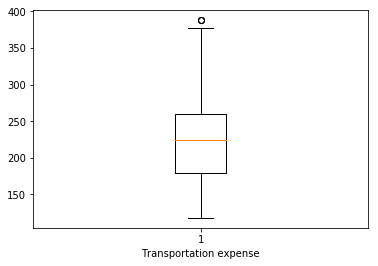

Distance from Residence to Work


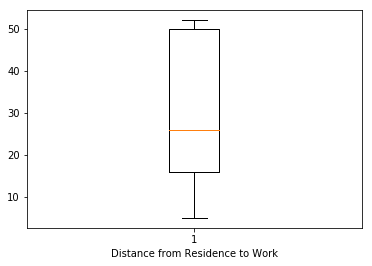

Service time


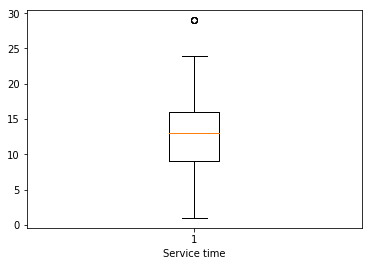

Age


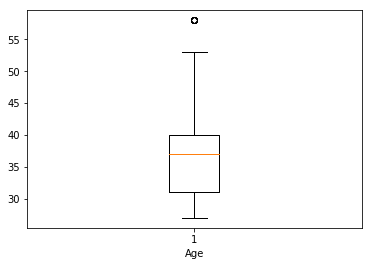

Work load Average/day 


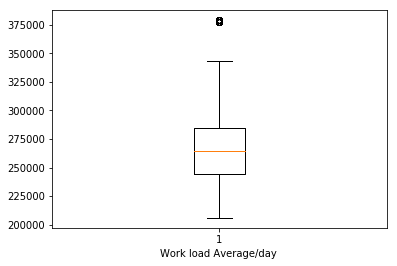

Hit target


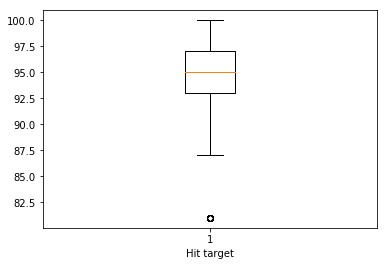

Weight


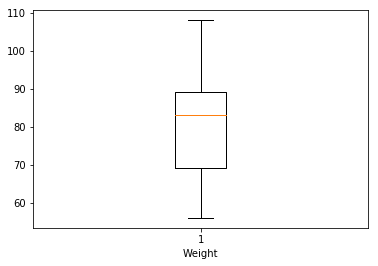

Height


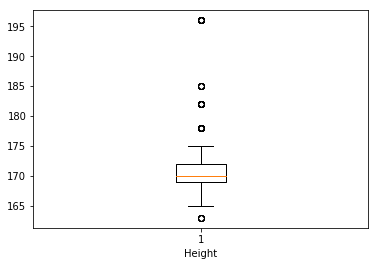

Body mass index


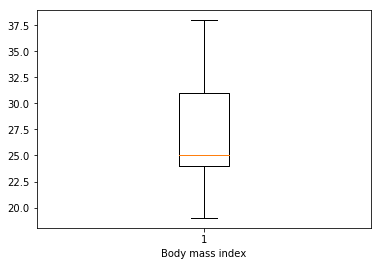

Absenteeism time in hours


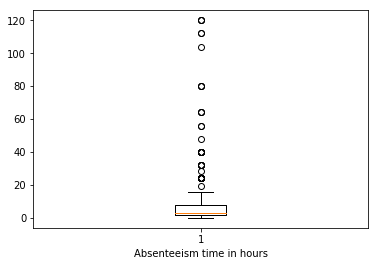

In [93]:
#boxplot to visualize Outliers 
import matplotlib.pyplot as plt
%matplotlib inline  
for i in DataCon.columns :
    print(i)
    plt.boxplot(DataSet[i])
    plt.xlabel(i)
    plt.show()
    

In [94]:
# Outlier Analysis
 
cnames = DataCon.columns
for col in cnames:
    #percentile = np.percentile(DataSet.loc[:,col],[75,25])
    percentile = DataSet[col].quantile([0.25,0.75]).values
    iqr = percentile[1] - percentile[0]
    minimum = percentile[0] - (iqr*1.5)
    maximum = percentile[1] + (iqr*1.5)
    print(col,percentile,maximum,minimum)
    DataSet[col][DataSet[col] <= minimum] = minimum
    DataSet[col][DataSet[col] >= maximum] = maximum

Transportation expense [179. 260.] 381.5 57.5
Distance from Residence to Work [16. 50.] 101.0 -35.0


/Users/bhartisharma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/bhartisharma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


Service time [ 9. 16.] 26.5 -1.5
Age [31. 40.] 53.5 17.5
Work load Average/day  [244387. 284853.] 345552.0 183688.0
Hit target [92.99999956 97.        ] 103.0000006573909 86.9999989043485
Weight [69. 89.] 119.0 39.0
Height [169. 172.] 176.5 164.5
Body mass index [24. 31.] 41.5 13.5
Absenteeism time in hours [2. 8.] 17.0 -7.0


Transportation expense


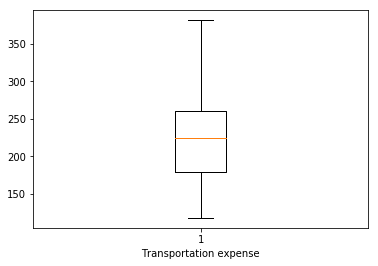

Distance from Residence to Work


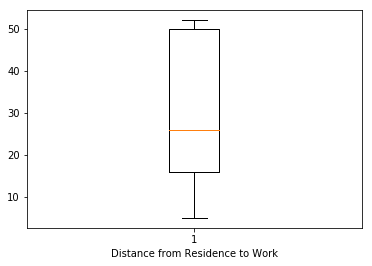

Service time


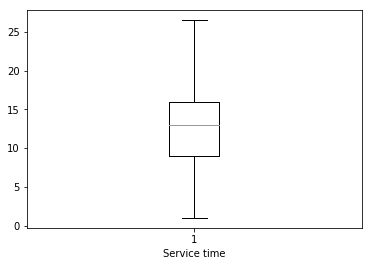

Age


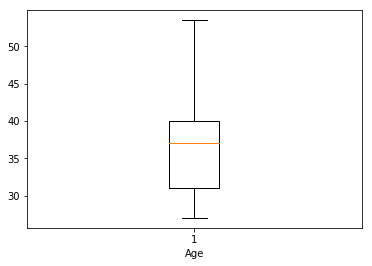

Work load Average/day 


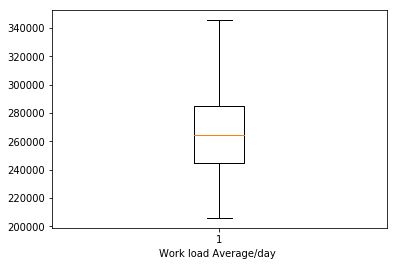

Hit target


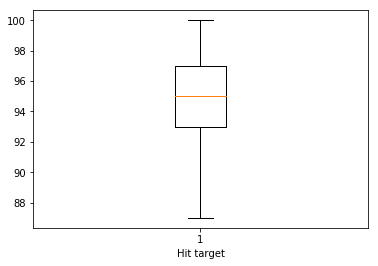

Weight


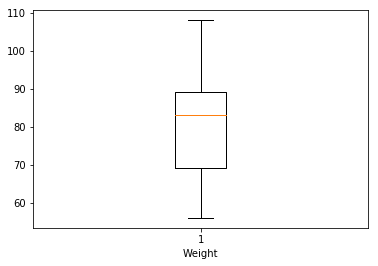

Height


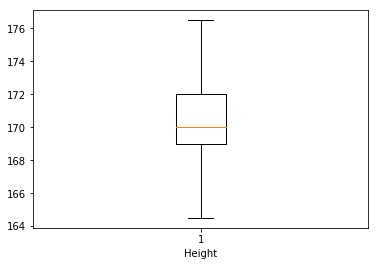

Body mass index


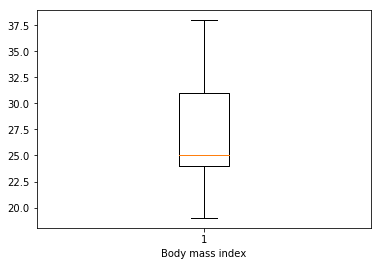

Absenteeism time in hours


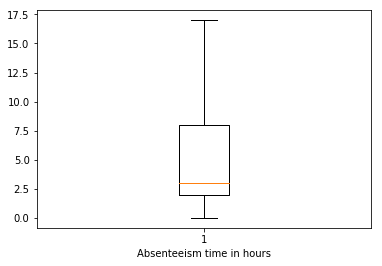

In [95]:
#Plot boxplot to visualize Outliers after replacing outliers
import matplotlib.pyplot as plt
%matplotlib inline  
for i in DataCon.columns :
    print(i)
    plt.boxplot(DataSet[i])
    plt.xlabel(i)
    plt.show()
    

# Feature selection

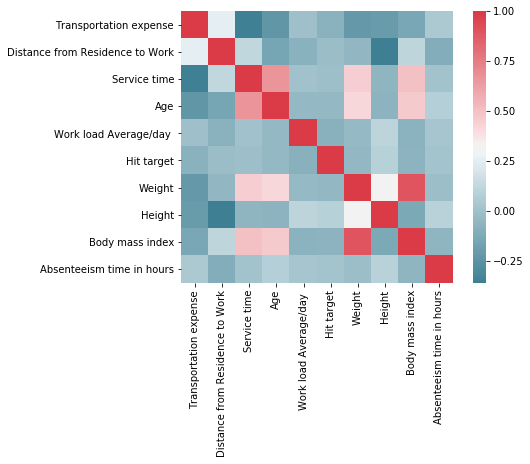

In [96]:
#Correlation plot for Continuous variables
import matplotlib.pyplot as plt
import seaborn as sns
cnames = DataCon.columns
df_corr = DataCon.loc[:,cnames]
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [97]:
#Continuous Variables selection using corr()function
DataCon_corr = DataCon.corr()

#from continuous variables variables
DataCon_corrVar = DataCon_corr[DataCon_corr > 0.5]

In [98]:
DataCon_corrVar

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Weight,Height,Body mass index,Absenteeism time in hours
Transportation expense,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance from Residence to Work,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service time,NaN,NaN,1.000000,0.670218,NaN,NaN,NaN,NaN,0.502634,NaN
Age,NaN,NaN,0.670218,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
Work load Average/day,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Hit target,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Weight,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,0.904060,NaN
Height,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Body mass index,NaN,NaN,0.502634,NaN,NaN,NaN,0.90406,NaN,1.000000,NaN
Absenteeism time in hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [99]:
#Making a list DataConCorrVar,which contains values only greater than 0.5
import numpy as np
#DataCon_corrVar = DataCon_corrVar.replace(np.nan,-1)
DataConCorrVar = []

for i  in range(0,DataCon_corrVar.shape[1]): 
        for j  in range(0,DataCon_corrVar.shape[1]):
            if(i != j):
                if((DataCon_corrVar.iloc[i,j] > 0.5).any(axis=0)):
#print(DataCon_corrVar.columns[i]+ " , "+DataCon_corrVar.columns[j] + " :",DataCon_corrVar.iloc[i,j])
                    DataConCorrVar.append((DataCon_corrVar.columns[i] , DataCon_corrVar.columns[j] ,DataCon_corrVar.iloc[i,j] ))   

In [100]:
#Convert to DataFrame
DataConCorrVar = pd.DataFrame(DataConCorrVar)
DataConCorrVar

,0,1,2
0,Service time,Age,0.670218
1,Service time,Body mass index,0.502634
2,Age,Service time,0.670218
3,Weight,Body mass index,0.904060
4,Body mass index,Service time,0.502634
5,Body mass index,Weight,0.904060


In [101]:
DataSet.columns

Index(['Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Weight',
       'Height', 'Body mass index', 'Absenteeism time in hours', 'ID',
       'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Education', 'Disciplinary failure', 'Social drinker', 'Social smoker',
       'Son', 'Pet'],
      dtype='object')

In [102]:
DataSet =DataSet.drop(['Age','Weight','Body mass index'],axis=1)
DataCon =DataCon.drop(['Age','Weight','Body mass index'],axis=1)


In [103]:
#Feature Selection for categorical data

In [104]:
DataCat.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet'],
      dtype='object')

In [105]:
#If p-value < 0.05: significant result, reject null hypothesis (H0), dependent.
#If independent variables are dependent to each other we can drop one of them .
#If p-value > 0.05: not significant result, fail to reject null hypothesis (H0), independent.

#1
corrVar = []
chi,p,def1,ex = chi2_contingency(pd.crosstab(DataCat['ID'],DataCat['Reason for absence']))
print(p)
#Drop ID
DataSet = DataSet.drop(['ID'],axis =1)
DataCat = DataCat.drop(['ID'],axis=1)
corrVar.append('Reason for absence')

4.0542553388658034e-61


In [106]:
#2
chi,p,def1,ex = chi2_contingency(pd.crosstab(DataCat['Month of absence'],DataCat['Reason for absence']))
print(p)
#drop 'Month of absence'
corrVar.append('Month of absence')
corrVar
#Drop 'Reason for absence'
DataSet = DataSet.drop(['Reason for absence'],axis =1)
DataCat = DataCat.drop(['Reason for absence'],axis=1)
corrVar.remove('Reason for absence')
corrVar

4.925169657693766e-19


['Month of absence']

In [107]:
#3
chi,p,def1,ex = chi2_contingency(pd.crosstab(DataCat['Month of absence'],DataCat['Day of the week']))
print(p)
corrVar.append('Day of the week')
corrVar


0.5544572956116095


['Month of absence', 'Day of the week']

In [108]:
#4
chi,p,def1,ex = chi2_contingency(pd.crosstab(DataCat['Day of the week'],DataCat['Seasons']))
print(p)
corrVar.append('Seasons')
corrVar

0.1953925388600992


['Month of absence', 'Day of the week', 'Seasons']

In [109]:
#5
chi,p,def1,ex = chi2_contingency(pd.crosstab(DataCat['Seasons'],DataCat['Disciplinary failure']))
print(p)
DataSet = DataSet.drop(['Disciplinary failure'],axis =1)
DataCat = DataCat.drop(['Disciplinary failure'],axis=1)

7.817284312620508e-05


In [110]:
#6
chi,p,def1,ex = chi2_contingency(pd.crosstab(DataCat['Education'],DataCat['Seasons']))
corrVar.append('Education')
print(p)
corrVar

0.09018080436255627


['Month of absence', 'Day of the week', 'Seasons', 'Education']

In [111]:
#7
chi,p,def1,ex = chi2_contingency(pd.crosstab(DataCat['Son'],DataCat['Education']))
print(p)
#drop 'Son'
DataSet = DataSet.drop(['Son'],axis =1)
DataCat = DataCat.drop(['Son'],axis=1)

2.8823822525296954e-12


In [112]:
#8
chi,p,def1,ex = chi2_contingency(pd.crosstab(DataCat['Social drinker'],DataCat['Day of the week']))
print(p)

corrVar

0.632521334190322


['Month of absence', 'Day of the week', 'Seasons', 'Education']

In [113]:
#9
chi,p,def1,ex = chi2_contingency(pd.crosstab(DataCat['Social drinker'],DataCat['Education']))
print(p)
corrVar.append('Social drinker')
DataSet = DataSet.drop(['Education'],axis =1)
DataCat = DataCat.drop(['Education'],axis=1)
corrVar

2.41869576743245e-35


['Month of absence',
 'Day of the week',
 'Seasons',
 'Education',
 'Social drinker']

In [114]:
#10
chi,p,def1,ex = chi2_contingency(pd.crosstab(DataCat['Social smoker'],DataCat['Social drinker']))
print(p)
DataSet = DataSet.drop(['Social smoker'],axis =1)
DataCat = DataCat.drop(['Social smoker'],axis=1)


0.0058247838997921245


In [115]:
#11
chi,p,def1,ex = chi2_contingency(pd.crosstab(DataCat['Pet'],DataCat['Social drinker']))
print(p)
DataSet = DataSet.drop(['Pet'],axis =1)
DataCat = DataCat.drop(['Pet'],axis=1)


1.1969272219740736e-26


In [116]:
# Now we have got 4 variables , and we will check correlation among them
corrVar

['Month of absence',
 'Day of the week',
 'Seasons',
 'Education',
 'Social drinker']

In [117]:
#12
chi,p,def1,ex = chi2_contingency(pd.crosstab(DataCat['Month of absence'],DataCat['Day of the week']))
print(p)
#corrVar

0.5544572956116095


In [118]:
#13
chi,p,def1,ex = chi2_contingency(pd.crosstab(DataCat['Month of absence'],DataCat['Seasons']))
print(p)
corrVar.remove('Seasons')
corrVar
DataSet = DataSet.drop(['Seasons'],axis =1)
DataCat = DataCat.drop(['Seasons'],axis=1)

0.0


In [119]:
#14
chi,p,def1,ex = chi2_contingency(pd.crosstab(DataCat['Day of the week'],DataCat['Social drinker']))
print(p)
corrVar

0.632521334190322


['Month of absence', 'Day of the week', 'Education', 'Social drinker']

In [120]:
#15
chi,p,def1,ex = chi2_contingency(pd.crosstab(DataCat['Month of absence'],DataCat['Social drinker']))
print(p)
corrVar
DataSet = DataSet.drop(['Month of absence'],axis =1)
DataCat = DataCat.drop(['Month of absence'],axis=1)

0.00947949884256757


In [121]:
DataSet.head()

,Transportation expense,Distance from Residence to Work,Service time,Work load Average/day,Hit target,Height,Absenteeism time in hours,Day of the week,Social drinker
0,289.0,36.000000,13.0,239554.0,97.0,172.0,4.0,1,1.0
1,118.0,13.000000,18.0,239554.0,97.0,176.5,0.0,1,1.0
2,179.0,51.000000,18.0,239554.0,97.0,170.0,2.0,2,1.0
3,279.0,5.000000,14.0,239554.0,97.0,168.0,4.0,3,1.0
4,289.0,36.847827,13.0,239554.0,97.0,172.0,2.0,3,1.0


# Feature Scaling


In [122]:
#Nomalisation
cnames = DataCon.columns
for i in cnames:
    DataSet[i] = (DataSet[i] - min(DataSet[i]))/(max(DataSet[i]) - min(DataSet[i]))

In [123]:
DataSet.head(2)

,Transportation expense,Distance from Residence to Work,Service time,Work load Average/day,Hit target,Height,Absenteeism time in hours,Day of the week,Social drinker
0,0.648956,0.659574,0.470588,0.240892,0.769231,0.625,0.235294,1,1.0
1,0.000000,0.170213,0.666667,0.240892,0.769231,1.000,0.000000,1,1.0


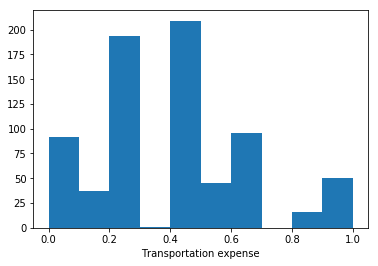

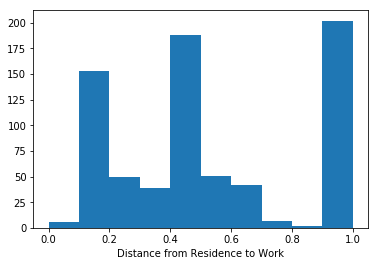

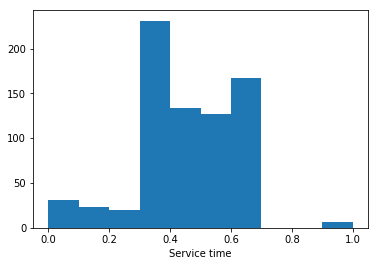

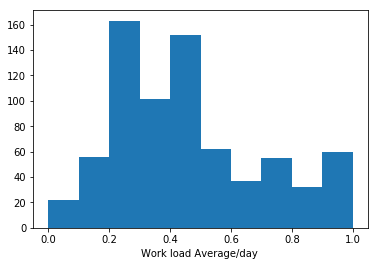

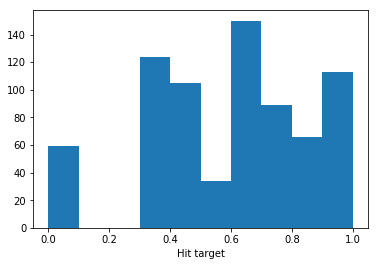

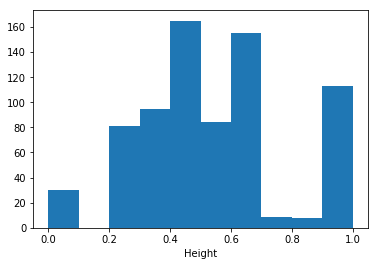

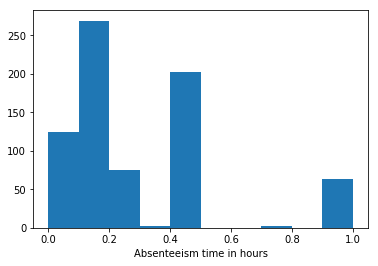

In [124]:
#Plot Histogram for Normality check
for i in cnames:
    plt.hist(DataSet[i])
    plt.xlabel(i)
    plt.show()

# Model development

Linear Regression Model

In [125]:
#Create linear data. Save target variable first
dataset_LR = pd.DataFrame()
#Add continous variables
dataset_LR = DataSet[DataCon.columns]
#Creating dummy Variables for categorical variables
cat_names = DataCat.columns
for i in cat_names:
    temp = pd.get_dummies(DataSet[i], prefix = i)
    dataset_LR = dataset_LR.join(temp)

In [126]:
#Split dataset
#Creating Target variable and dropping target variable from dataset
from sklearn.model_selection import train_test_split
y = DataSet['Absenteeism time in hours']
dataset_LR=dataset_LR.drop('Absenteeism time in hours',axis=1)
X = dataset_LR[dataset_LR.columns]

In [127]:
#Sampling 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 6)

In [128]:
#3 Import libraries for LR
import statsmodels.api as sm

# Train the model using the training sets
LRdataModel = sm.OLS(y_train,X_train)
LRdataModel = LRdataModel.fit()
LRpredictions = LRdataModel.predict(X_test)

# Print out the statistics
LRdataModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Absenteeism time in hours   R-squared:                       0.082
Model:                                   OLS   Adj. R-squared:                  0.065
Method:                        Least Squares   F-statistic:                     4.711
Date:                       Thu, 15 Nov 2018   Prob (F-statistic):           6.21e-07
Time:                               00:26:20   Log-Likelihood:                -19.673
No. Observations:                        592   AIC:                             63.35
Df Residuals:                            580   BIC:                             115.9
Df Model:                                 11                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Transportation expense              0.1601      0.048      3.370      0.001       0.067       0.253
Distance from Residence to Work    -0.1279      0.041     -3.099      0.002      -0.209      -0.047
Service time                       -0.0340      0.075     -0.454      0.650      -0.181       0.113
Work load Average/day               0.1081      0.041      2.628      0.009       0.027       0.189
Hit target                          0.0476      0.042      1.145      0.253      -0.034       0.129
Height                              0.0201      0.049      0.408      0.683      -0.077       0.117
Day of the week_0                   0.1123      0.027      4.110      0.000       0.059       0.166
Day of the week_1                   0.0697      0.028      2.483      0.013       0.015       0.125
Day of the week_2                   0.0700      0.029      2.381      0.018       0.012       0.128
Day of the week_3                   0.0510      0.031      1.623      0.105      -0.011       0.113
Day of the week_4                   0.0126      0.029      0.440      0.660      -0.044       0.069
Social drinker_0.0                  0.1108      0.045      2.457      0.014       0.022       0.199
Social drinker_1.0                  0.2048      0.058      3.555      0.000       0.092       0.318
==============================================================================
Omnibus:                      109.638   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.722
Skew:                           1.174   Prob(JB):                     6.96e-39
Kurtosis:                       4.268   Cond. No.                     1.08e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.14e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Error Measure

In [129]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
MeanAbsoluteError = mean_absolute_error(y_test,LRpredictions)
MeanAbsoluteError

0.20200674830926016

In [130]:
#RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, LRpredictions))
rms

0.2635315644492806

In [131]:
#Cross Validation Technique
#Sampling 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state = 6,)

In [132]:
# Train the model using the training sets
LRdataModel = sm.OLS(y_train,X_train)
LRdataModel = LRdataModel.fit()
LRpredictions = LRdataModel.predict(X_test)

# Print out the statistics
LRdataModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Absenteeism time in hours   R-squared:                       0.049
Model:                                   OLS   Adj. R-squared:                  0.020
Method:                        Least Squares   F-statistic:                     1.679
Date:                       Thu, 15 Nov 2018   Prob (F-statistic):             0.0762
Time:                               00:26:25   Log-Likelihood:                -21.980
No. Observations:                        370   AIC:                             67.96
Df Residuals:                            358   BIC:                             114.9
Df Model:                                 11                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Transportation expense              0.1146      0.061      1.875      0.062      -0.006       0.235
Distance from Residence to Work    -0.1026      0.053     -1.932      0.054      -0.207       0.002
Service time                       -0.0720      0.105     -0.688      0.492      -0.278       0.134
Work load Average/day               0.0594      0.053      1.115      0.266      -0.045       0.164
Hit target                          0.0152      0.056      0.272      0.785      -0.094       0.125
Height                              0.0179      0.062      0.289      0.772      -0.104       0.140
Day of the week_0                   0.1068      0.037      2.872      0.004       0.034       0.180
Day of the week_1                   0.0994      0.037      2.689      0.008       0.027       0.172
Day of the week_2                   0.0793      0.039      2.026      0.043       0.002       0.156
Day of the week_3                   0.0847      0.040      2.142      0.033       0.007       0.162
Day of the week_4                   0.0398      0.039      1.033      0.302      -0.036       0.116
Social drinker_0.0                  0.1623      0.060      2.703      0.007       0.044       0.280
Social drinker_1.0                  0.2477      0.077      3.223      0.001       0.097       0.399
==============================================================================
Omnibus:                       70.241   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.865
Skew:                           1.188   Prob(JB):                     3.78e-24
Kurtosis:                       4.161   Cond. No.                     1.08e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.13e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [2]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
MeanAbsoluteError = mean_absolute_error(y_test,LRpredictions)
MeanAbsoluteError

NameError: name 'y_test' is not defined

NameError: name 'MeanAbsoluteError' is not defined

In [134]:
#RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, LRpredictions))
rms

0.25237816057758955

In [135]:
#1 Decision Tree

In [136]:
#convert categorical  variables to codes, So that we can easily compute and impute easily
for i in range(0,DataSet.shape[1]):
    if(DataSet.iloc[:,i].dtypes == 'object'):
        DataSet.iloc[:,i] = pd.Categorical(dataset.iloc[:,i])
        dataset.iloc[:,i] = dataset.iloc[:,i].cat.codes
        

In [137]:
#Split dataset
from sklearn.model_selection import train_test_split
X = DataSet[DataSet.columns]
#Creating Target variable and dropping target variable from dataset
y = DataSet['Absenteeism time in hours']
DataSet=DataSet.drop('Absenteeism time in hours',axis=1)

In [138]:
#Sampling 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 6)

In [139]:
#Applying Model

from sklearn.tree import DecisionTreeRegressor
DataModel = DecisionTreeRegressor(random_state =6,max_depth=2)
DataModel = DataModel.fit(X_train,y_train)
predictions = DataModel.predict(X_test)

In [140]:
#Create dot file to visualise tree  #http://webgraphviz.com/
from sklearn import tree
df = tree.export_graphviz(DataModel, out_file='tree1.dot' ,feature_names = X.columns)

In [141]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
MeanAbsoluteError = mean_absolute_error(y_test,predictions)
MeanAbsoluteError

0.026607381360232097

In [142]:
#RMSE
rms = sqrt(mean_squared_error(y_test, predictions))
rms

0.03333931627847547

In [143]:
#2 RandomForest

In [144]:
#Sampling 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 6)

In [145]:
## 2 RandomForest
from sklearn.ensemble import RandomForestRegressor
DataModel_RF = RandomForestRegressor(random_state=7, max_depth=3, n_estimators=300)
DataModel_RF = DataModel_RF.fit(X_train,y_train)
RFpredictions = DataModel_RF.predict(X_test)

In [146]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
MeanAbsoluteError = mean_absolute_error(y_test,RFpredictions)
MeanAbsoluteError

0.008319121519228275

In [147]:
#RMSE
rms = sqrt(mean_squared_error(y_test, RFpredictions))
rms

0.014646776110099001

KNN Model

In [148]:
#Sampling 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 6)

In [149]:
#4 KNN implementation
from sklearn.neighbors import KNeighborsRegressor
KNN_Model = KNeighborsRegressor()
KNN_Model = KNN_Model.fit(X_train,y_train)
KNNpredictions = KNN_Model.predict(X_test)

In [150]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
MeanAbsoluteError = mean_absolute_error(y_test,KNNpredictions)
MeanAbsoluteError

0.10468032502739649

In [151]:
#RMSE
rms = sqrt(mean_squared_error(y_test, KNNpredictions))
rms

0.14775234583731964

Random Forest

In [152]:
from sklearn.ensemble import RandomForestRegressor
DataModel_RF = RandomForestRegressor(random_state=7, max_depth=3, n_estimators=300)
DataModel_RF = DataModel_RF.fit(X_train,y_train)
RFpredictions = DataModel_RF.predict(X)

In [153]:
#Creating output file for Testdata
DataTestFinal= pd.read_excel("Absenteeism_at_work_Project.xls")


In [154]:
#Creating output file for Testdata
DataTestFinal= pd.read_excel("Absenteeism_at_work_Project.xls")


#Creating output file for Testdata
df_output = pd.DataFrame()
df_output[DataTestFinal.columns] = DataTestFinal[DataTestFinal.columns]
df_output['Predicted_Absenteeism'] = RFpredictions
df_output.to_csv('Absenteeism_Output.csv',index=False)




Scatter plot showing Loss Per Month

In [ ]:
#Scatter plot for
#creating dictionary dict for holding important independent variables
dict = {
   'Transportation expense': 'red',
    'Distance from Residence to Work':'blue',
    'Service time': 'green'  ,
    'Height':'pink'           ,
    'Work load Average/day' : 'yellow'   ,
    'Hit target' : 'magenta'       ,
    'Day of the week' :  'black',
    'Social drinker' : 'orange'
}

#Creating list to hold dict values
col = []
for i in dict :
    col.append(dict[i])

In [ ]:
#Creating a new dataframe df
df = pd.DataFrame(dataset['Absenteeism time in hours'])
if(df.iloc[:,0].dtypes=='object'):
    df.iloc[:,0]=pd.Categorical(df.iloc[:,0])
    df.iloc[:,0] = df.iloc[:,0].cat.codes      

In [ ]:
#Scatter plot between 'Absenteeism time in hours' , 'Month of absence' and using cols and pop to show intensity of absenteeism as per featues and per month
import matplotlib.pyplot as plt
pop = dataset['Absenteeism time in hours']
plt.scatter(df['Absenteeism time in hours'], dataset['Month of absence'],c = col , s = np.array(pop) * 20 , alpha=0.8)
plt.xlabel('Absenteeism time in hours')
plt.ylabel('Month of absence')
plt.show()